In [1]:
# Import Libraries
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from keras import regularizers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
# Import Data
path_B = '/Users/las/Documents/GitHub/REU/Data/data_B.csv'
df_B = pd.read_csv(path_B)
df_B[df_B.no % 2==1] = df_B[df_B.no % 2==1] + 1 

In [3]:
# Create Training and Validation Data (B)
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(
    df_B.drop("no", axis=1).astype('float64'),
    df_B["no"]//2, 
    test_size=0.2, random_state=42)

X_train_B, X_test_B, y_train_B, y_test_B = np.asarray(X_train_B), np.asarray(X_test_B), np.asarray(y_train_B), np.asarray(y_test_B)
print(f"(B): There a {len(X_train_B)} training samples and {len(X_test_B)} test samples.")

(B): There a 40000 training samples and 10000 test samples.


In [4]:
# Model Set Up
model_B = keras.Sequential([
    keras.layers.Dense(units=1000, activation='relu', input_shape=(18,)),
    keras.layers.Dense(units=1000, activation='relu'),
    keras.layers.Dense(units=93, activation='softmax')
])

sce = keras.losses.SparseCategoricalCrossentropy()
model_B.compile(optimizer='Adam', loss=sce, metrics=['accuracy', sce])

2022-11-08 21:53:50.920223: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-08 21:53:50.924578: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


In [5]:
# Train Model
history_B = model_B.fit(
    X_train_B,
    y_train_B,
    verbose=0,
    epochs=25,
    batch_size=64,
    validation_data=(
        X_test_B,
        y_test_B
    )
)

/Users/las/opt/anaconda3/envs/REU/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


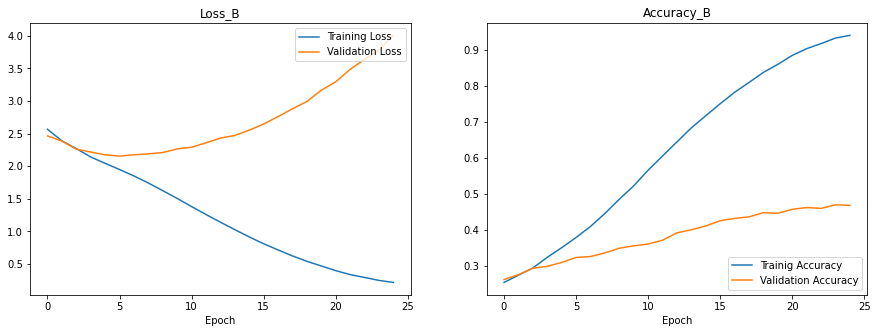

In [6]:
# Plot Training History
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(history_B.history['loss'], label="Training Loss") 
axs[0].plot(history_B.history['val_loss'], label="Validation Loss")
axs[0].set_title("Loss_B")
axs[0].legend(loc="upper right")
axs[1].plot(history_B.history['accuracy'], label="Trainig Accuracy") 
axs[1].plot(history_B.history['val_accuracy'], label="Validation Accuracy")
axs[1].legend(loc="lower right")
axs[1].set_title("Accuracy_B")
axs[1].sharex(axs[0])

for ax in axs.flat:
    ax.set(xlabel='Epoch')
fig.show()

In [8]:
# Print Accuracies
print(f"Validation Accuracy of model_B: {history_B.history['val_accuracy'][-1]}") 
print(f"Training Accuracy of model_B : {history_B.history['accuracy'][-1]}") 

Validation Accuracy of model_B: 0.4681999981403351
Training Accuracy of model_B : 0.9395250082015991


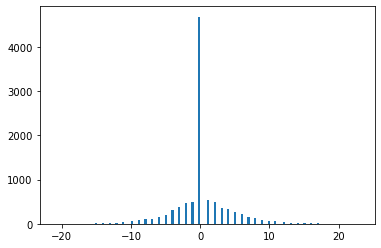

In [32]:
# Analyse Error Distribution on Testing Data
df = pd.DataFrame(X_test_B)
prediction = np.argmax(model_B.predict(df), axis=1)
delta = y_test_B - prediction
delta_dist = {val: 0 for val in sorted(set(delta))}
for val in delta:
    delta_dist[val] += 1 

delta_hist = [key for key, val in delta_dist.items() for _ in range(val)]
fig = plt.hist(delta_hist, bins=136)
plt.show()

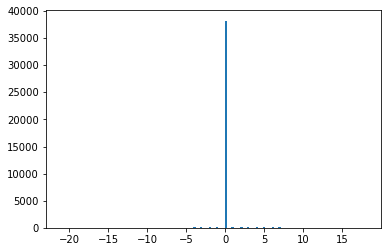

In [ ]:
# Analyse Error Distribution on Training Data
df = pd.DataFrame(X_train_B)
prediction = np.argmax(model_B.predict(df), axis=1)
delta = y_train_B - prediction
delta_dist = {val: 0 for val in sorted(set(delta))}
for val in delta:
    delta_dist[val] += 1 

delta_hist = [key for key, val in delta_dist.items() for _ in range(val)]
fig = plt.hist(delta_hist, bins=136)
plt.show()